## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
data_path=r'/Users/Lilian/Downloads/Data Analytics Course/Data Analytics Immersion/Acheivement 6/Project/Data/'

In [4]:
# importing data frame
airbnb = pd.read_csv(os.path.join(data_path,'airbnb-europe.csv'))

In [5]:
airbnb.shape

(41714, 19)

In [13]:
sub_numeric = airbnb[['Price','City Center (km)', 'Metro Distance (km)' ,'Cleanliness Rating', 'Guest Satisfaction']]

In [14]:
sub_numeric.corr()

,Price,City Center (km),Metro Distance (km),Cleanliness Rating,Guest Satisfaction
Price,1.000000,-0.052462,-0.038989,0.003987,0.016069
City Center (km),-0.052462,1.000000,0.458042,0.004794,0.031176
Metro Distance (km),-0.038989,0.458042,1.000000,0.019296,0.025290
Cleanliness Rating,0.003987,0.004794,0.019296,1.000000,0.691645
Guest Satisfaction,0.016069,0.031176,0.025290,0.691645,1.000000


/Users/lilian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lilian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lilian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lilian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

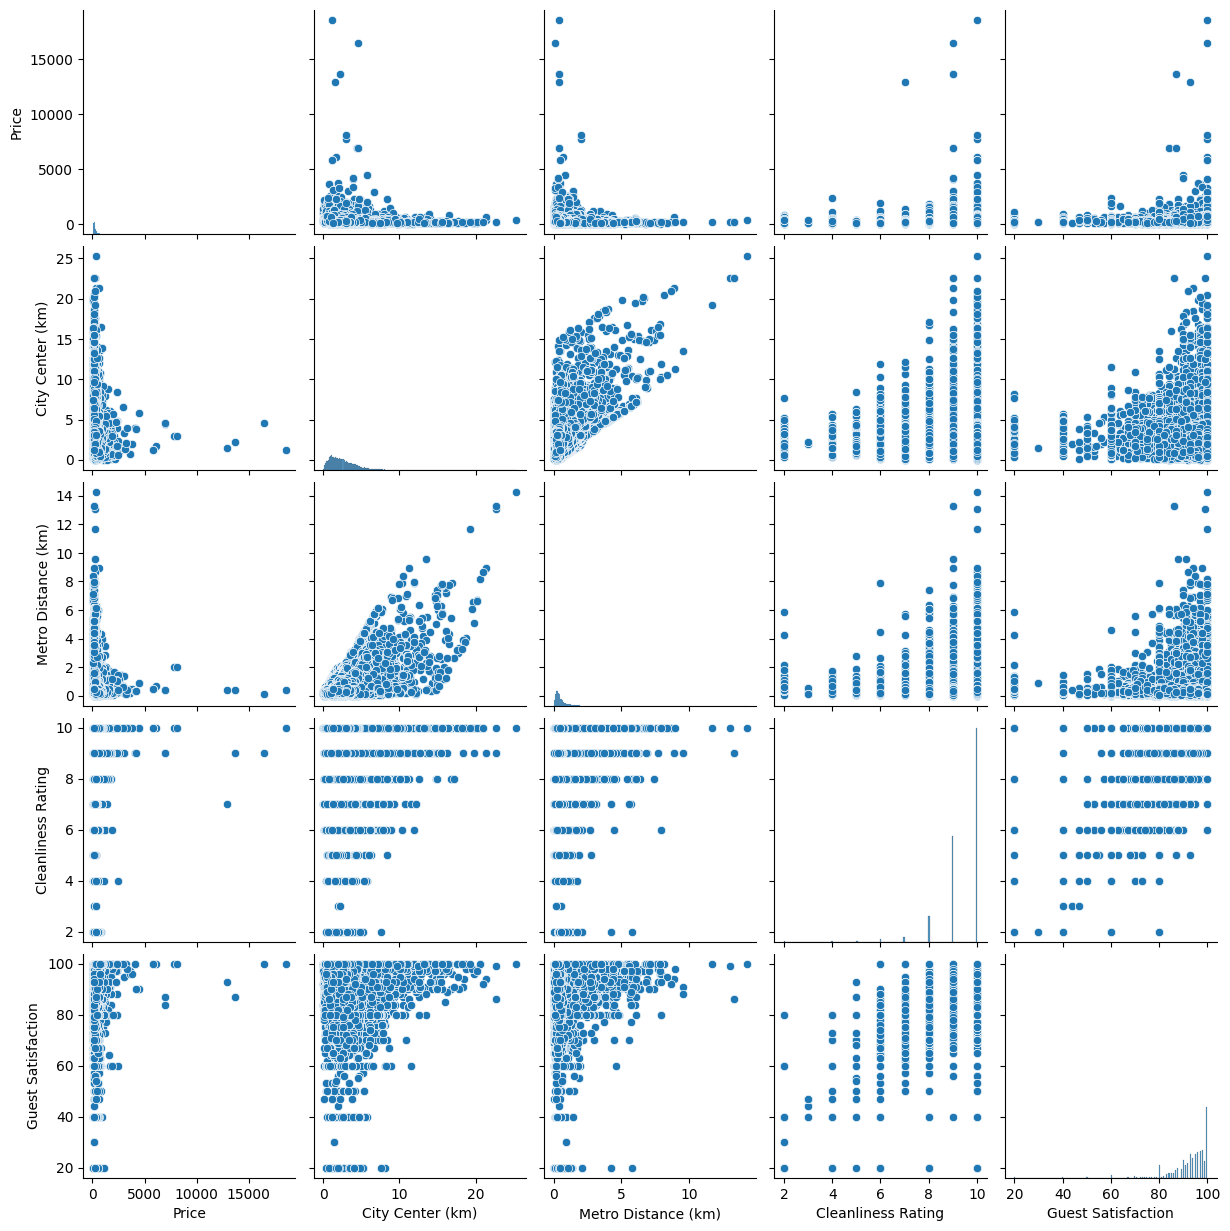

In [15]:
# creating pair plots
sns.pairplot(sub_numeric)

In [16]:
sub_numeric['Price'].mean()

260.09442261413653

In [17]:
sub_numeric['Price'].median()

203.8192740107052

In [18]:
sub_numeric['Price'].max()

18545.450284723363

## Hypothesis: prices of accomodations are higher when they are located near metro stations

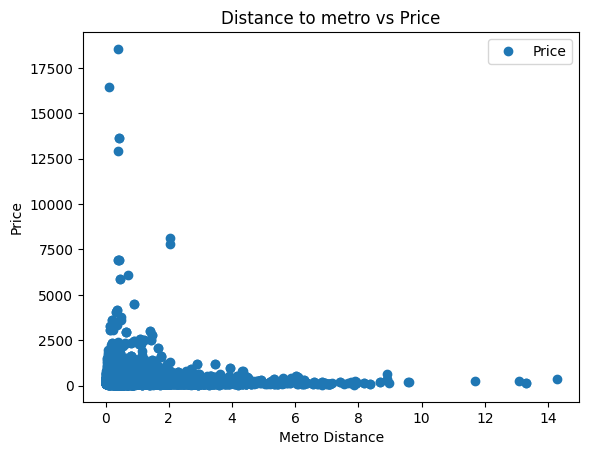

In [19]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sub_numeric.plot(x = 'Metro Distance (km)', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to metro vs Price')  
plt.xlabel('Metro Distance')  
plt.ylabel('Price')  
plt.show()

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sub_numeric['Metro Distance (km)'].values.reshape(-1,1)
y = sub_numeric['Price'].values.reshape(-1,1)

In [22]:
X

array([[2.53938   ],
       [0.23940392],
       [3.65162129],
       ...,
       [0.20253882],
       [0.28743468],
       [0.48090251]])

In [23]:
y

array([[194.03369812],
       [344.24577602],
       [264.10142245],
       ...,
       [637.16896898],
       [301.05415702],
       [133.23048875]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

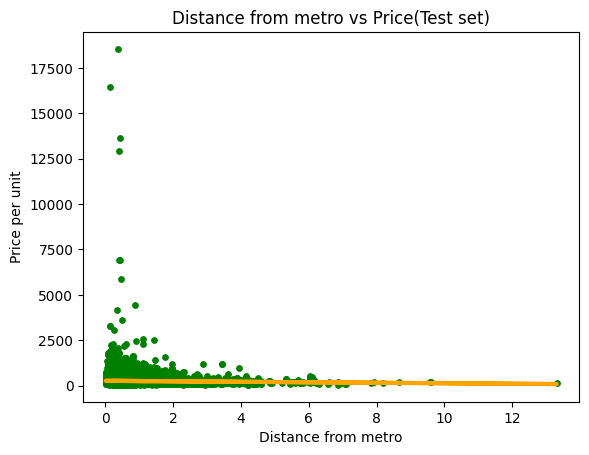

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Distance from metro vs Price(Test set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

##### The scatter plot suggests a negative relationship between distance from the metro and accommodation price. As the distance from the metro increases, the accommodation price tends to decrease. There are several data points with very high prices, especially close to the metro. These outliers might be luxury accommodations or special cases that differ significantly from the majority of the data. Most data points are clustered at lower prices and shorter distances from the metro. This clustering suggests that a large portion of accommodations are relatively affordable and located close to metro stations.

In [30]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-13.44155133]]
Mean squared error:  127943.9617705336
R2 score:  0.0008930376769838988


In [32]:
y_predicted

array([[262.40114724],
       [257.49520296],
       [262.71098253],
       ...,
       [261.5289504 ],
       [259.76567633],
       [249.48331718]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,181.848007,262.401147
1,190.900563,257.495203
2,174.366687,262.710983
3,344.160686,261.605627
4,237.158750,263.616260
5,171.797209,257.252652
6,208.676035,261.264445
7,216.674847,252.557250
8,100.813085,240.025543
9,636.702364,259.591327


#### the model did not do well on prediction as the actual values are far different than predicted values!